Example IPython notebook for using Finesse with PyKat
=============

[PyKat](http://www.gwoptics.org/pykat) is a Python wrapper for the interferometer simulation [Finesse]( http://www.gwoptics.org/finesse). This notebook shows a simple example how PyKat can be used to call Finesse from Python in order to do some simple post-processing of the Finesse output. 

The optical setup is an optical cavity, two amplitude detectors are used to measure the optical phases at the input mirror. Post-processing this output in Python we can plot the phase difference between the injected field and the circulating field. This difference becomes zero when the cavity is on resonance. Thus the phase difference presents a simple means to find the cavity resonance, for example with a root finding algorithm.

The notebook was started using 'ipython notebook --pylab inline'.


First we import the main bits from PyKat:

In [1]:
from pykat import finesse
from pykat.commands import *
import matplotlib.pyplot as plt

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



Next we can create a 'kat' object and parse some Finesse source code to fill it:

In [2]:
kat = finesse.kat()
kat.verbose = False
kat_code = """
 l psl 1.0 0 npsl 
 s s1 0 npsl nITM1

 m1 ITM 0.02 0 0 nITM1 nITM2  
 attr ITM Rc -2500  
 s s_cav 5000 nITM2 nETM1    
 m1 ETM 0.001 0 0 nETM1 nETM2
 attr ETM Rc 2700   
 cav c1 ITM nITM2 ETM nETM1

 ad carr2 0 nITM1*
 ad carr3 0 nITM2
 yaxis deg
 phase 0
 """

In [3]:
kat.parseKatCode(kat_code)
kat.maxtem=0
kat.parseKatCode("xaxis ETM phi lin 0 180 200")

C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: parseKatCode depreciated, use parse.
  """Entry point for launching an IPython kernel.
C:\Users\edwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: parseKatCode depreciated, use parse.
  This is separate from the ipykernel package so we can avoid doing imports until


The following commands run the Finesse simulation and read the results into the variable 'out', followed by the calculation of the phase difference.

In [4]:
out = kat.run()
rel_phase=(out["carr2"]-out["carr3"]-90)%360-180

And finally we plot the result:

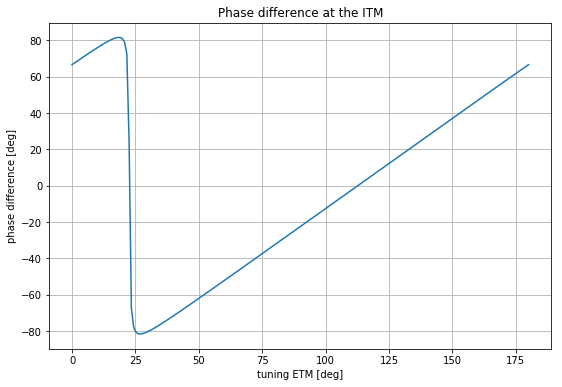

In [6]:
plt.figure(figsize=(9,6))
plt.plot(out.x,rel_phase)
plt.title(r'Phase difference at the ITM')
plt.xlabel('tuning ETM [deg]')
plt.ylabel('phase difference [deg]')
plt.grid()

This is an example of a simple task that benfits from the interactive enviroment provided by IPython.